In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv('social.csv')

In [5]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train = scale(X_train)
X_test = scale(X_test)

In [8]:
# gridsearchCV

params = [{
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['rbf', 'linear']
}]
optimal = GridSearchCV(SVC(), params, cv=5, scoring='accuracy', verbose=0)
optimal.fit(X_train, y_train)
print(optimal.best_estimator_)
print(optimal.best_params_)

SVC(C=1000, gamma=0.1)
{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


In [9]:
svm = SVC(random_state=42, kernel='rbf', C=1000, gamma=0.1)
svm.fit(X_train, y_train)

SVC(C=1000, gamma=0.1, random_state=42)

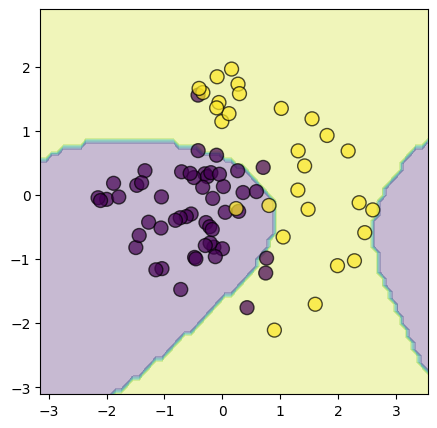

In [10]:
pca = PCA()
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)
test_pc1 = x_test_pca[:,0]
test_pc2 = x_test_pca[:,1]

x_min, x_max = test_pc1.min() - 1, test_pc1.max() + 1
y_min, y_max = test_pc2.min() - 1, test_pc2.max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(5,5))
ax.contourf(xx, yy, Z, alpha=0.3)
ax.scatter(test_pc1, test_pc2, c=y_test, s=100, cmap='viridis', edgecolors='k', alpha=0.7)

In [11]:
new_data = pd.DataFrame({'Age': [30], 'EstimatedSalary': [17000]})
new_data = scale(new_data)
svm.predict(new_data)

array([0])